In [305]:
import cv2
import numpy as np
import glob
from scipy import signal
import matplotlib.pyplot as plt

In [332]:
def get_images(folder):
    img_array = list()
    for filename in glob.glob(folder):
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        height, width = img.shape
        size = (width,height)
        img_array.append(img)
    return img_array


def video_from_img(folder, vide_name, images=None, fps=20.0):
    if not images:
        images = get_images(f"{folder}/*.jpg")
    size = (images[0].shape[1], images[0].shape[0])
    out = cv2.VideoWriter(f'{vide_name}.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, size)

    for img in images:
        out.write(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR))
    out.release()

In [307]:
def get_new_coords(search_img_area, prev_coords_img, search_area, cost_func, minimum):
    w, h = prev_coords_img.shape[1], prev_coords_img.shape[0]
    
    # if we want to find minimum init with inf and vice versa
    if minimum:
        chosen_diff = np.inf
    else:
        chosen_diff = 0
    coord_x, coord_y = None, None
    
    # slide through the search area
    for i in range(search_img_area.shape[0] - h):
        for j in range(search_img_area.shape[1] - w):
            
            diff = cost_func(search_img_area[i: i + h, j: j + w], prev_coords_img)
            
            # find optimum point
            if minimum:
                if diff < chosen_diff:
                    chosen_diff = diff
                    coord_x, coord_y = j, i
            else:
                if diff > chosen_diff:
                    chosen_diff = diff
                    coord_x, coord_y = j, i
    # go back to source image coords
    return search_area[0] + coord_y, search_area[1] + coord_x, w, h
            

In [324]:
def ssd(img1, img2):
    return np.sum((img1 - img2)**2)

def sad(img1, img2):
    return np.sum(np.abs(img1 - img2))

def ncc(img1, img2):
    img1_norm = img1 - np.mean(img1)
    img2_norm = img2 - np.mean(img2)
    corr = np.sum(img1_norm*img2_norm)/np.sqrt(np.sum(img1_norm**2)*np.sum(img2_norm**2))
    return corr

In [346]:
def tracking(images, init_coords, cost_func, search_pad, minimum=True, skip=0):
    coords = init_coords
    labeled_images = list()
    prev_coords = None
    for idx, img in enumerate(images):
        if (idx + 1)%10==0:
            print(f"{idx + 1} from {len(images)}")
        img_copy = img.copy()
        if skip and idx%skip != 0:
            # in case we want to skipp some frames
            cv2.rectangle(img_copy, 
                          (prev_coords[0], prev_coords[1]), 
                          (prev_coords[0] + prev_coords[2], prev_coords[1] + prev_coords[3]), 
                          (255, 255, 255), 2)
            labeled_images.append(img_copy)
            continue
        
        if prev_coords is None:
            # if it is first iteration set ground truth as previous coordinates and move forward
            prev_coords = coords
            cv2.rectangle(img_copy, 
                          (prev_coords[0], prev_coords[1]), 
                          (prev_coords[0] + prev_coords[2], prev_coords[1] + prev_coords[3]), 
                          (255, 255, 255), 2)
            labeled_images.append(img_copy)
            continue
        else:
            # with aim to not search along all image search only in some area
            search_area = (prev_coords[0] - search_pad, 
                       prev_coords[1] - search_pad, 
                       prev_coords[0] + prev_coords[2] + search_pad, 
                       prev_coords[1] + prev_coords[3] + search_pad)
            search_img_area = img_copy[search_area[1]: search_area[1] + search_area[3],
                                  search_area[0]: search_area[0]+ search_area[2]]
            
            prev_coords_img = img_copy[prev_coords[1]: prev_coords[1] + prev_coords[3],
                                  prev_coords[0]: prev_coords[0]+ prev_coords[2]]
            #find new coords with provided cost func
            prev_coords = get_new_coords(search_img_area, prev_coords_img, search_area, cost_func, minimum)
            
            #draw rect
            cv2.rectangle(img_copy, 
                          (prev_coords[0], prev_coords[1]), 
                          (prev_coords[0] + prev_coords[2], prev_coords[1] + prev_coords[3]), 
                          (255, 255, 255), 2)
            labeled_images.append(img_copy)
    return labeled_images



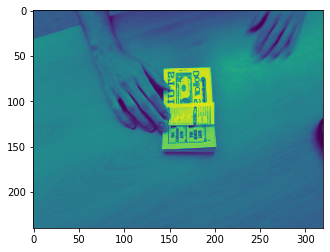

In [311]:
images = get_images('tracker_data/Coupon/img/*.jpg')
plt.imshow(images[0])

In [347]:
res = tracking(images, [144,63,57,89], ssd, 50)

10 from 327
20 from 327
30 from 327
40 from 327
50 from 327
60 from 327
70 from 327
80 from 327
90 from 327
100 from 327
110 from 327
120 from 327
130 from 327
140 from 327
150 from 327
160 from 327
170 from 327
180 from 327
190 from 327
200 from 327
210 from 327
220 from 327
230 from 327
240 from 327
250 from 327
260 from 327
270 from 327
280 from 327
290 from 327
300 from 327
310 from 327
320 from 327


In [313]:
res_sad = tracking(images, [144,63,57,89], sad, 50)

10 from 327
20 from 327
30 from 327
40 from 327
50 from 327
60 from 327
70 from 327
80 from 327
90 from 327
100 from 327
110 from 327
120 from 327
130 from 327
140 from 327
150 from 327
160 from 327
170 from 327
180 from 327
190 from 327
200 from 327
210 from 327
220 from 327
230 from 327
240 from 327
250 from 327
260 from 327
270 from 327
280 from 327
290 from 327
300 from 327
310 from 327
320 from 327


In [330]:
res_ncc = tracking(images, [144,63,57,89], ncc, 50, minimum=False)

10 from 327
20 from 327
30 from 327
40 from 327
50 from 327
60 from 327
70 from 327
80 from 327
90 from 327
100 from 327
110 from 327
120 from 327
130 from 327
140 from 327
150 from 327
160 from 327
170 from 327
180 from 327
190 from 327
200 from 327
210 from 327
220 from 327
230 from 327
240 from 327
250 from 327
260 from 327
270 from 327
280 from 327
290 from 327
300 from 327
310 from 327
320 from 327


In [348]:
video_from_img('', 'results/res_ssd', images=res, fps=15.0)
video_from_img('', 'results/res_sad', images=res_sad, fps=15.0)
video_from_img('', 'results/res_ncc', images=res_ncc, fps=15.0)

In [335]:
images2 = get_images('tracker_data/MountainBike/img/*.jpg')

In [336]:
res2 = tracking(images2, [319,185,67,56], ssd, 50)

10 from 228
20 from 228
30 from 228
40 from 228
50 from 228
60 from 228
70 from 228
80 from 228
90 from 228
100 from 228
110 from 228
120 from 228
130 from 228
140 from 228
150 from 228
160 from 228
170 from 228
180 from 228
190 from 228
200 from 228
210 from 228
220 from 228


In [338]:
res2_sad = tracking(images2, [319,185,67,56], sad, 50)

10 from 228
20 from 228
30 from 228
40 from 228
50 from 228
60 from 228
70 from 228
80 from 228
90 from 228
100 from 228
110 from 228
120 from 228
130 from 228
140 from 228
150 from 228
160 from 228
170 from 228
180 from 228
190 from 228
200 from 228
210 from 228
220 from 228


In [339]:
res2_ncc = tracking(images2, [319,185,67,56], ncc, 50, minimum=False)

10 from 228
20 from 228
30 from 228
40 from 228
50 from 228
60 from 228
70 from 228
80 from 228
90 from 228
100 from 228
110 from 228
120 from 228
130 from 228
140 from 228
150 from 228
160 from 228
170 from 228
180 from 228
190 from 228
200 from 228
210 from 228
220 from 228


In [340]:
video_from_img('', 'results/res2_ssd', images=res2, fps=15.0)
video_from_img('', 'results/res2_sad', images=res2_sad, fps=15.0)
video_from_img('', 'results/res2_ncc', images=res2_ncc, fps=15.0)

In [341]:
images3 = get_images('tracker_data/Twinnings/img/*.jpg')

In [342]:
res3 = tracking(images3, [125,162,74,55], ssd, 50)

10 from 472
20 from 472
30 from 472
40 from 472
50 from 472
60 from 472
70 from 472
80 from 472
90 from 472
100 from 472
110 from 472
120 from 472
130 from 472
140 from 472
150 from 472
160 from 472
170 from 472
180 from 472
190 from 472
200 from 472
210 from 472
220 from 472
230 from 472
240 from 472
250 from 472
260 from 472
270 from 472
280 from 472
290 from 472
300 from 472
310 from 472
320 from 472
330 from 472
340 from 472
350 from 472
360 from 472
370 from 472
380 from 472
390 from 472
400 from 472
410 from 472
420 from 472
430 from 472
440 from 472
450 from 472
460 from 472
470 from 472


In [343]:
res3_sad = tracking(images3, [125,162,74,55], sad, 50)

10 from 472
20 from 472
30 from 472
40 from 472
50 from 472
60 from 472
70 from 472
80 from 472
90 from 472
100 from 472
110 from 472
120 from 472
130 from 472
140 from 472
150 from 472
160 from 472
170 from 472
180 from 472
190 from 472
200 from 472
210 from 472
220 from 472
230 from 472
240 from 472
250 from 472
260 from 472
270 from 472
280 from 472
290 from 472
300 from 472
310 from 472
320 from 472
330 from 472
340 from 472
350 from 472
360 from 472
370 from 472
380 from 472
390 from 472
400 from 472
410 from 472
420 from 472
430 from 472
440 from 472
450 from 472
460 from 472
470 from 472


In [344]:
res3_ncc = tracking(images3, [125,162,74,55], ncc, 50, minimum=False)

10 from 472
20 from 472
30 from 472
40 from 472
50 from 472
60 from 472
70 from 472
80 from 472
90 from 472
100 from 472
110 from 472
120 from 472
130 from 472
140 from 472
150 from 472
160 from 472
170 from 472
180 from 472
190 from 472
200 from 472
210 from 472
220 from 472
230 from 472
240 from 472
250 from 472
260 from 472
270 from 472
280 from 472
290 from 472
300 from 472
310 from 472
320 from 472
330 from 472
340 from 472
350 from 472
360 from 472
370 from 472
380 from 472
390 from 472
400 from 472
410 from 472
420 from 472
430 from 472
440 from 472
450 from 472
460 from 472
470 from 472


In [345]:
video_from_img('', 'results/res3_ssd', images=res3, fps=15.0)
video_from_img('', 'results/res3_sad', images=res3_sad, fps=15.0)
video_from_img('', 'results/res3_ncc', images=res3_ncc, fps=15.0)

It is quite interesting and not so obvious for me, why the tracker "not moving" at the images, as it looks like everything was done properly. Defenetely I am missing something, unfortunately right now I cant figure out what. From my thouths, atleast at the first video the template matching trackers should work, in comparing to the third video where we have the different scale changes and rotation. Obviously, that solution where we are imitating the situtation when we have both detector and tracker, and after some time update the object location will perform even better.